<a href="https://colab.research.google.com/github/Manojkumar310897/Guvi-Final-projects/blob/main/Customer_conversion_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Customer Conversion Prediction - Customer Conversion Prediction.csv")
df.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
df.shape

(45211, 11)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

**Checking whether the data is balanced or not**

In [ ]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
((39922)/(39922+5289))*100

88.30151954170445

In [ ]:
((5289)/(39922+5289))*100

11.698480458295547

The target data is imbalanced, because almost 88% of data is from no.

1.MAJORITY CLASS is from no (88.3%) 
2.MINORITY CLASS is from yes (11.6%)

In [ ]:
df['y']=df['y'].map({'yes':1,'no':0})

# **DATA CLEANING**

**1.Checking and handling the missing values**

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

# There are no null values in the dataset

**2.Spelling correction**

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
df['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
df['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

**3.Checking the data types**

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

**4.Removing the duplicates**

In [ ]:
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool


In [ ]:
df.duplicated().sum()

6

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(45205, 11)

**5.Checking for the outliers**

In [ ]:
df.describe()

,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


<AxesSubplot:xlabel='age'>

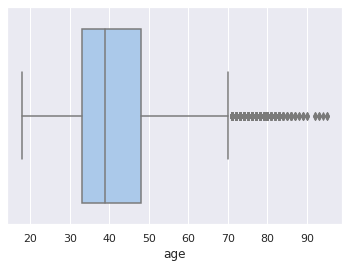

In [ ]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='day'>

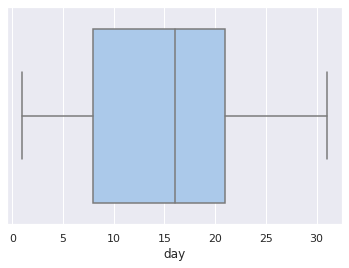

In [ ]:
sns.boxplot(df['day'])

In [ ]:
outlier=[]
mean,std=40.937087,10.619130
for i in df['age']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

outlier1=[]
mean1,std1=15.80688,8.32234	
for i in df['day']:
    x = (i-mean1)/std1
    if x > 3 or x <-3:
        outlier1.append(i)
print(len(outlier1))

381
0


AGE: Having a valid outlier...min age-18,max age-95.

DAY: There is no outliers...min -1, max -31

<AxesSubplot:xlabel='dur'>

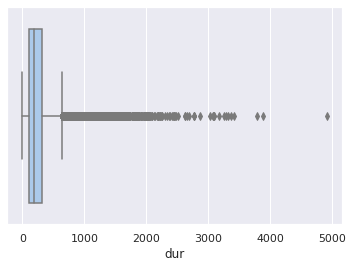

In [ ]:
sns.boxplot(df['dur'])

<AxesSubplot:xlabel='num_calls'>

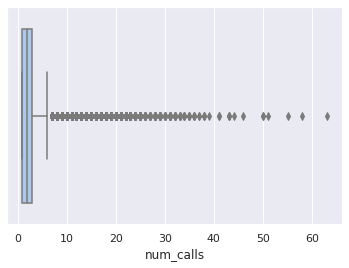

In [ ]:
sns.boxplot(df['num_calls'])

In [ ]:
outlier=[]
mean,std=258.183055,257.538504
for i in df['dur']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

outlier1=[]
mean1,std1=2.763898,3.098189	
for i in df['num_calls']:
    x = (i-mean1)/std1
    if x > 3 or x <-3:
        outlier1.append(i)
print(len(outlier1))
     

963
840


DURATION: Having a valid outliers...min-0,max-4918(nearly 1hr 20 minutes).

NUM_CALLS: Having a valid outliers...min-1,max-63

# Explanatory Data Analysis

From EDA we can decide the encode type and feature relationships and importance.

**1.Distribution of features**

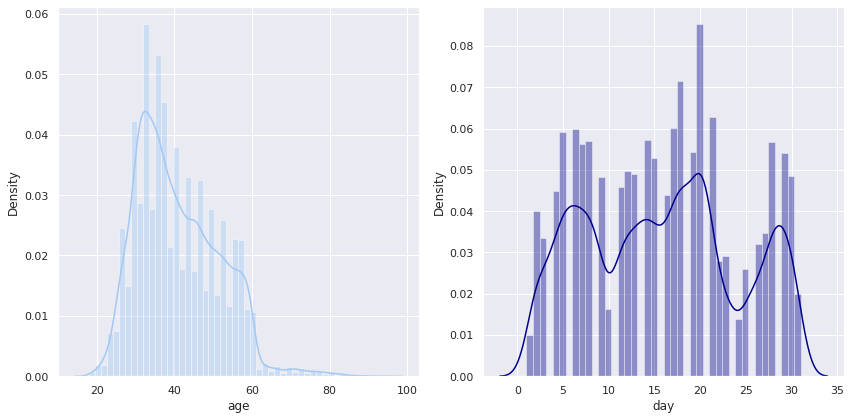

In [ ]:

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df['age'])
plt.subplot(1,2,2)
sns.distplot(df['day'],color = 'darkblue')
plt.tight_layout()

The age is distributed between 18 to 95.Middle aged people from 30 to 50 are active in INSURANCE processes.

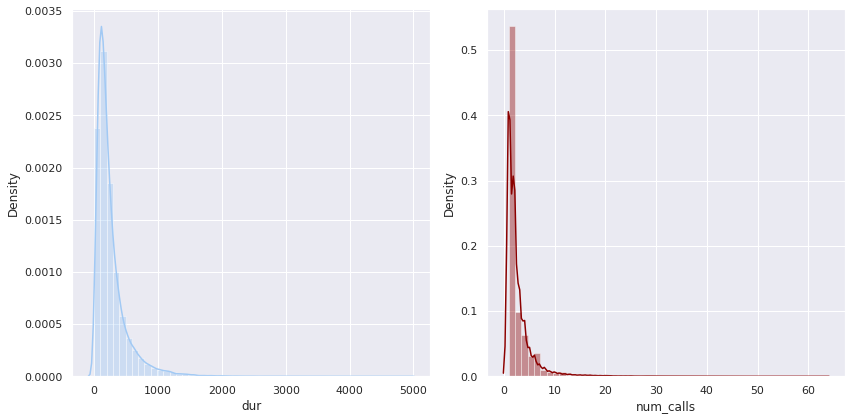

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df['dur'])
plt.subplot(1,2,2)
sns.distplot(df['num_calls'],color = 'darkred')
plt.tight_layout()

The dur distributed between 0 to 1500. The NUM_CALLS distributed between 1 to 31.

# **Percentage distribution**

UNIVARIATE ANALYSIS

**JOB**

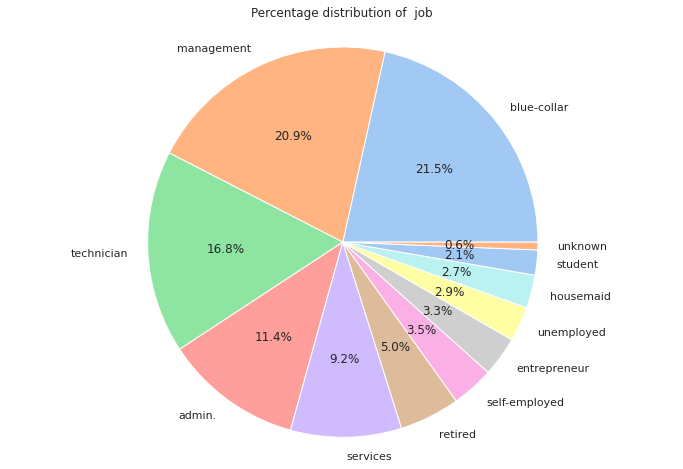

In [ ]:
plt.figure(figsize=(12,8))
df_source = df.job.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['job'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percentage distribution of  job')
plt.axis('equal')
plt.show()   

By this plot we came to know Blue-collar got High percentage and unknown got low percentage

**MARITAL**

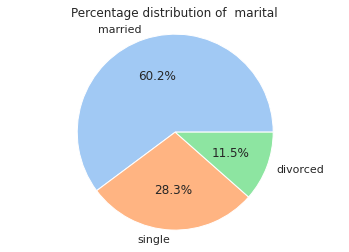

In [ ]:
df_source = df.marital.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['marital'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percentage distribution of  marital')
plt.axis('equal')
plt.show() 

By this percentage distribution we came to know Married people got more commitment than the unmarried and divorced

**EDUCATIONAL QUALIFICATION**

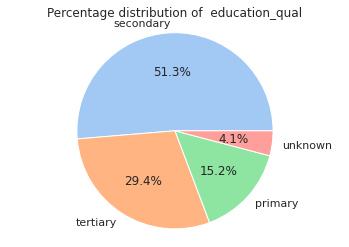

In [ ]:
df_source = df.education_qual.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['education_qual'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percentage distribution of  education_qual')
plt.axis('equal')
plt.show() 

In percentage wise distribution in education qualification, we got SECONDARY distributed more than others. Here, SECONDARY qualified may aware of the insurance benefits other than people over mentioned here.

**CALL_TYPE**

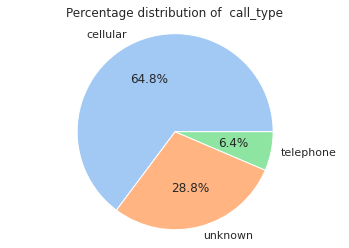

In [ ]:
df_source = df.call_type.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['call_type'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percentage distribution of  call_type')
plt.axis('equal')
plt.show() 

In percentage wise distribution in call type,we got cellular distributed more than others.

**MONTH**

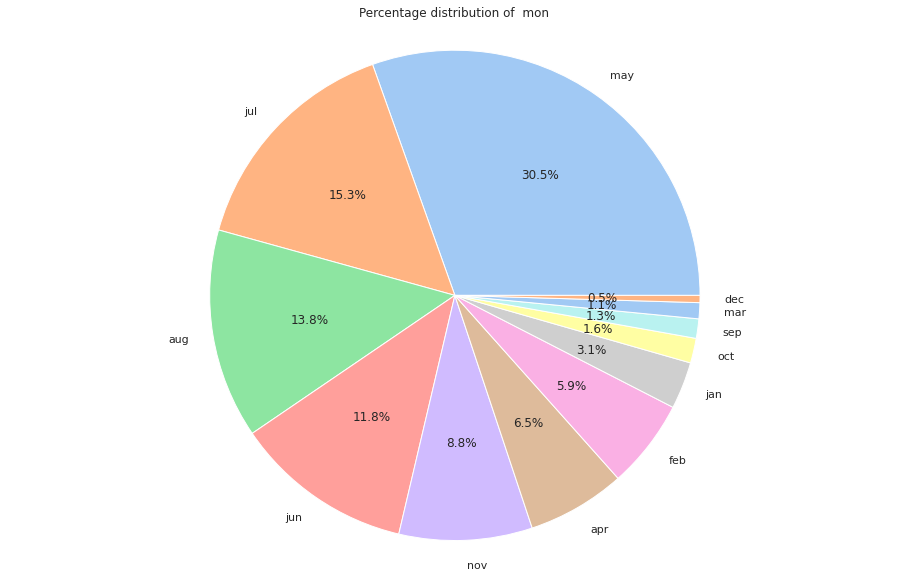

In [ ]:
plt.figure(figsize=(16,10))
df_source = df.mon.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source["mon"],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percentage distribution of  mon')
plt.axis('equal')
plt.show() 

In percentage wise distribution during the Month of MAY got distributed more than others and DEC get the least count.

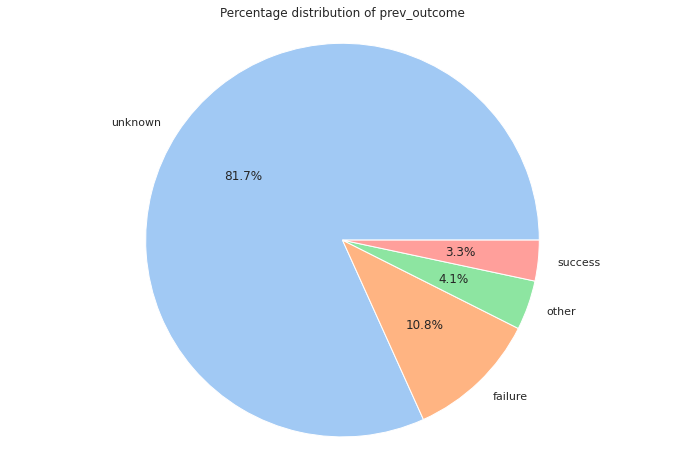

In [ ]:
plt.figure(figsize=(12,8))
df_source = df.prev_outcome.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source["prev_outcome"],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percentage distribution of prev_outcome')
plt.axis('equal')
plt.show() 

In percentage wise distribution in PREVIOUS OUTCOME,unknown distributed more than others.

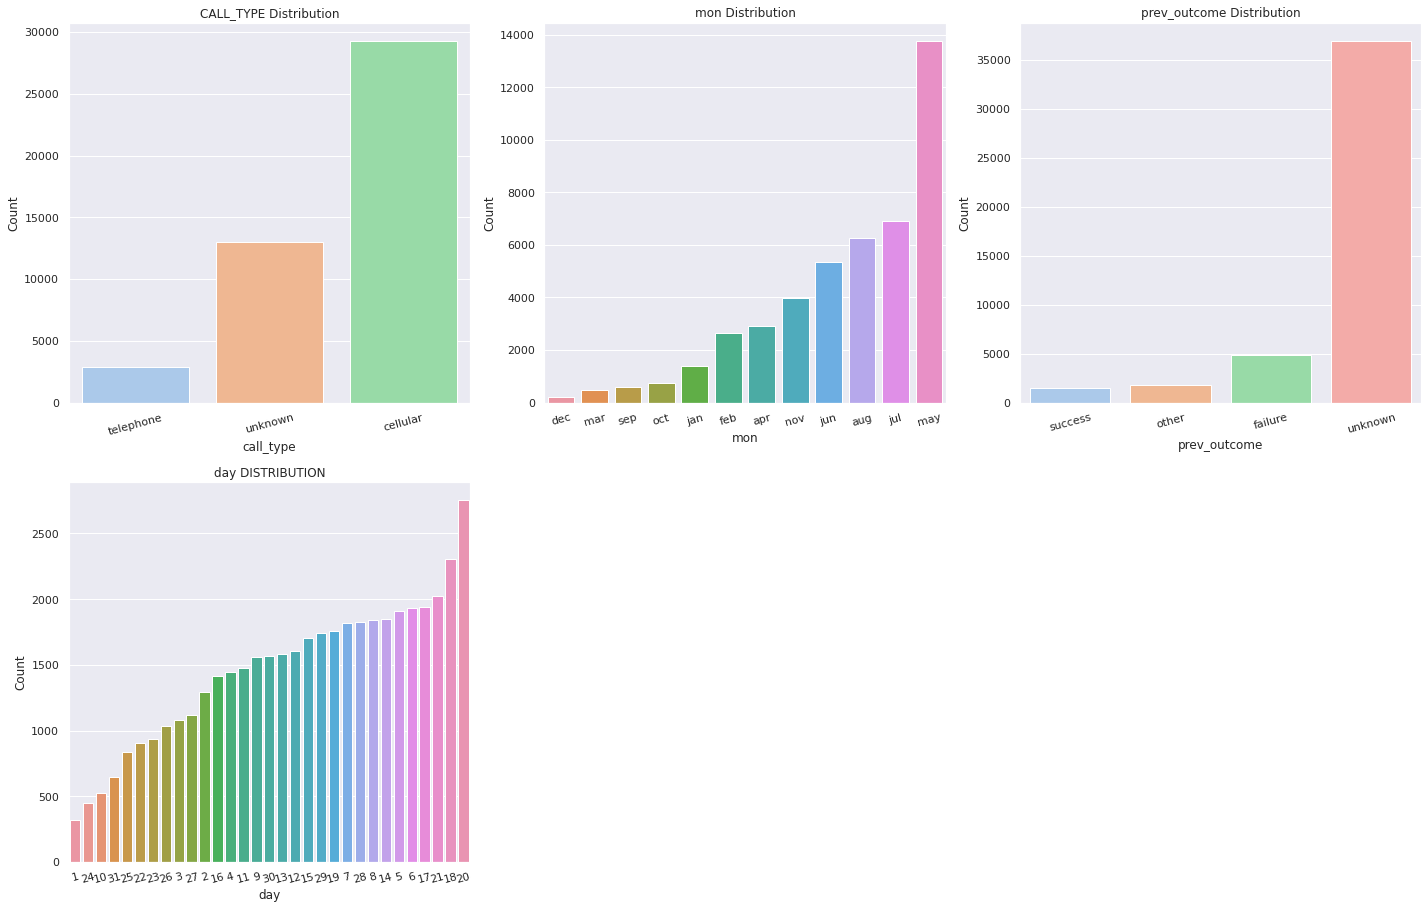

In [ ]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(df['call_type'],order=df['call_type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('call_type')
plt.ylabel('Count')
plt.title('CALL_TYPE Distribution')

plt.subplot(432)
sns.countplot(df['mon'],order=df['mon'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('mon')
plt.ylabel('Count')
plt.title('mon Distribution')

plt.subplot(433)
sns.countplot(df['prev_outcome'],order=df['prev_outcome'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('prev_outcome')
plt.ylabel('Count')
plt.title('prev_outcome Distribution')

plt.subplot(434)
sns.countplot(df['day'],order=df['day'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('day')
plt.ylabel('Count')
plt.title('day DISTRIBUTION')


plt.tight_layout()

**Percentage of features in together**

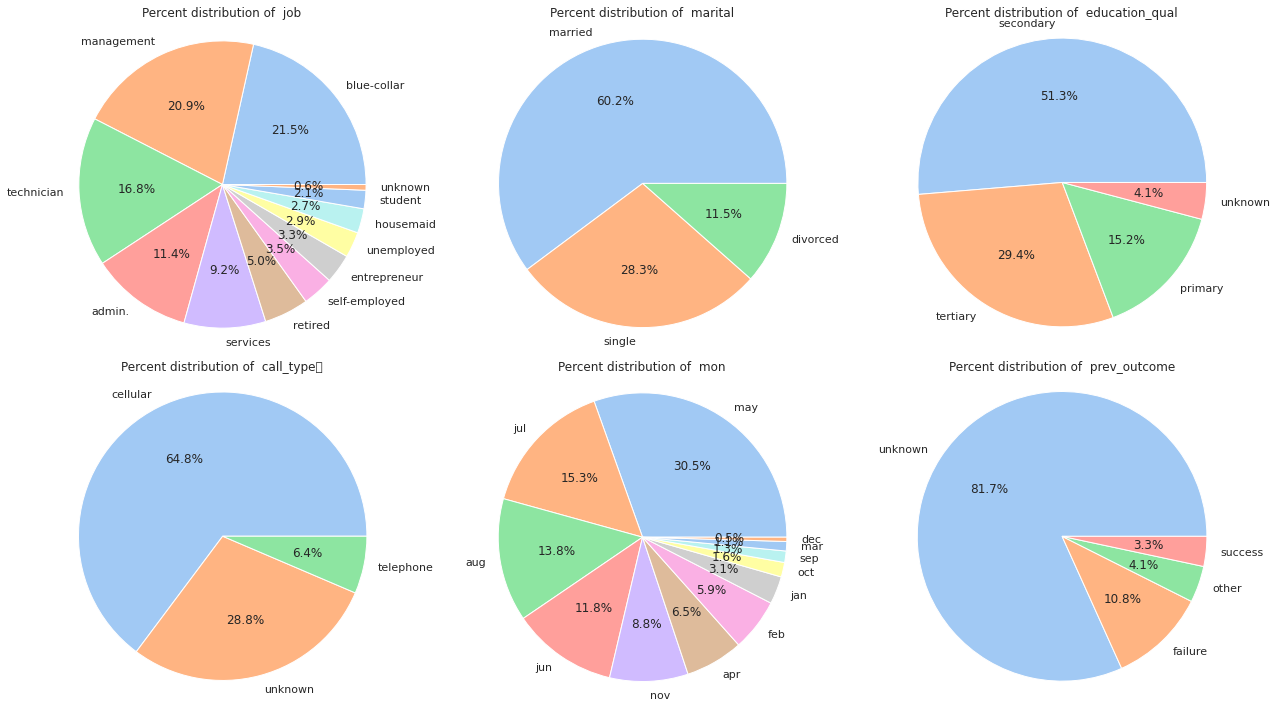

In [ ]:
plt.figure(figsize=(18,10))

plt.subplot(231)
df_source = df.job.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['job'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  job')
plt.axis('equal')

plt.subplot(232)
df_source = df.marital.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['marital'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  marital')
plt.axis('equal')

plt.subplot(233)
df_source = df.education_qual.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['education_qual'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  education_qual')
plt.axis('equal')

plt.subplot(234)
df_source = df.call_type	.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['call_type'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  call_type	')
plt.axis('equal')

plt.subplot(235)
df_source = df.mon.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['mon'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  mon')
plt.axis('equal')

plt.subplot(236)
df_source = df.prev_outcome.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['prev_outcome'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  prev_outcome')
plt.axis('equal')

plt.tight_layout()
plt.show()

**For Continuous Variables**

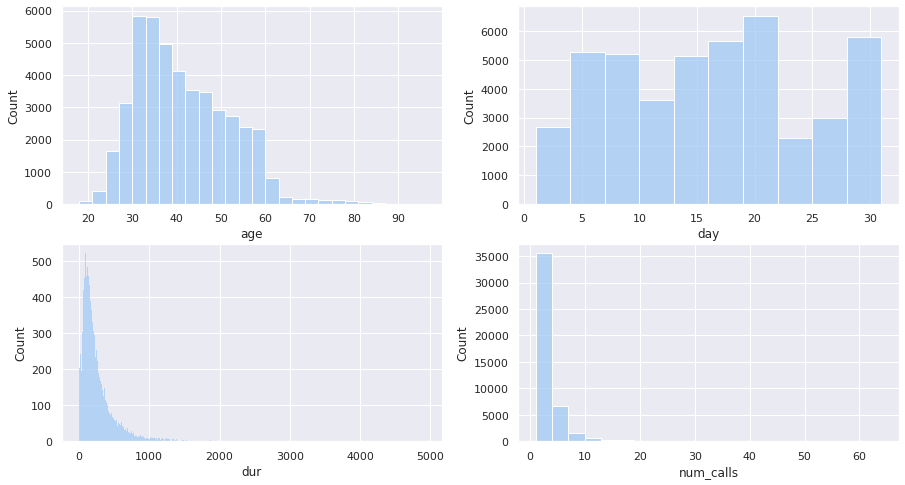

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.histplot(data=df, x="age", binwidth=3)

plt.subplot(222)
sns.histplot(data=df, x="day", binwidth=3)

plt.subplot(223)
sns.histplot(data=df, x="dur", binwidth=3)

plt.subplot(224)
sns.histplot(data=df, x="num_calls", binwidth=3)

plt.show()
plt.tight_layout()
     

1.**AGE** distributed b/w more at the age of 30 plus to 50
2**.DAY** : The middle days of month recieve more than other.
3.**DUR**: Call duration impact the model to subcribe the insurance.
4.**NUM_CALLS**: num_calls also one of the reason to sbscribe the insurance.


# **FEATURES VS TARGET**

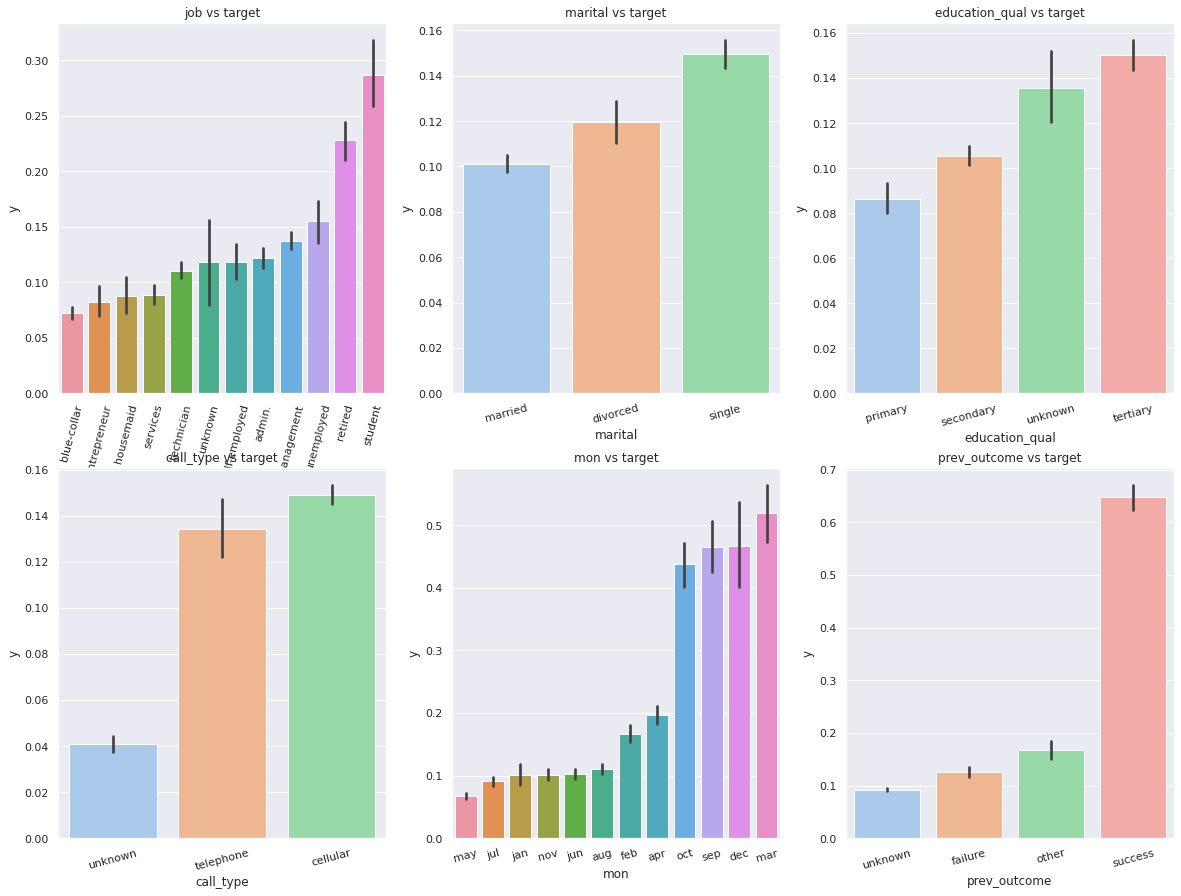

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(231)
sns.barplot(x='job',y='y',data=df,order=df.groupby('job')['y'].mean().reset_index().sort_values('y')['job'])
plt.xticks(rotation=75)
plt.title('job vs target')

plt.subplot(232)
sns.barplot(x='marital',y='y',data=df,order=df.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital'])
plt.xticks(rotation=15)
plt.title('marital vs target')

plt.subplot(233)
sns.barplot(x='education_qual',y='y',data=df,order=df.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual'])
plt.xticks(rotation=15)
plt.title('education_qual vs target')

plt.subplot(234)
sns.barplot(x='call_type',y='y',data=df,order=df.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type'])
plt.xticks(rotation=15)
plt.title('call_type vs target')

plt.subplot(235)
sns.barplot(x='mon',y='y',data=df,order=df.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon'])
plt.xticks(rotation=15)
plt.title('mon vs target')

plt.subplot(236)
sns.barplot(x='prev_outcome',y='y',data=df,order=df.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome'])
plt.xticks(rotation=15)
plt.title('prev_outcome vs target')

plt.show()
plt.tight_layout()
     

# **INTERPRETATIONS**

**1.FROM JOB VS TARGET** , We got that student are targeted to subcribe the insurance more than others and then, the RETIRED people are targeted more. We can use one-hot encoding for job because of there is no linear increase in job column. But it may leads to us to handle more number of columns.SO, here we avoid one-hot and go with label.


2.**FROM MARITIAL VS TARGET** , We got SINGLE people targeted more to subscribe the insurance more than others.
We can use one-hot encoding for marital because, there is no linear increase in marital column.


**3.FROM EQUCATION QUALIFICATION VS TARGET** , We got TERTIARY people interested more to subscribe the insurance more than others.
Education qualification gives as a linear increase, so we will go with lable encoding.


4**.FROM CALL TYPE VS TARGET ,** We got CELLULAR people interested more to subscribe the insurance more than others.
There is no linear increase in call_type column.so, we want to do one-hot encode. But here we took lable encoding to avoid columns complexity.


**5.FROM MONTH VS TARGET **, We got MAR month scored much amount to subscribe the insurance more than others. Because, the trend during the month of MARCH is high, as march being the end of financial year in INDIA and the month of DECEMBER is the second highest one as being the financial year in ABROADS.



**6.FROM PREVIOUS OUTCOME VS TARGET **, We got SUCCESS people interested more to subscribe the insurance more than others.
There is no linear increase in Previous outcome column.SO, we will go with one hot encoding for prev_outcome.

**Plotting line plots for integer column vs Target Variable.**

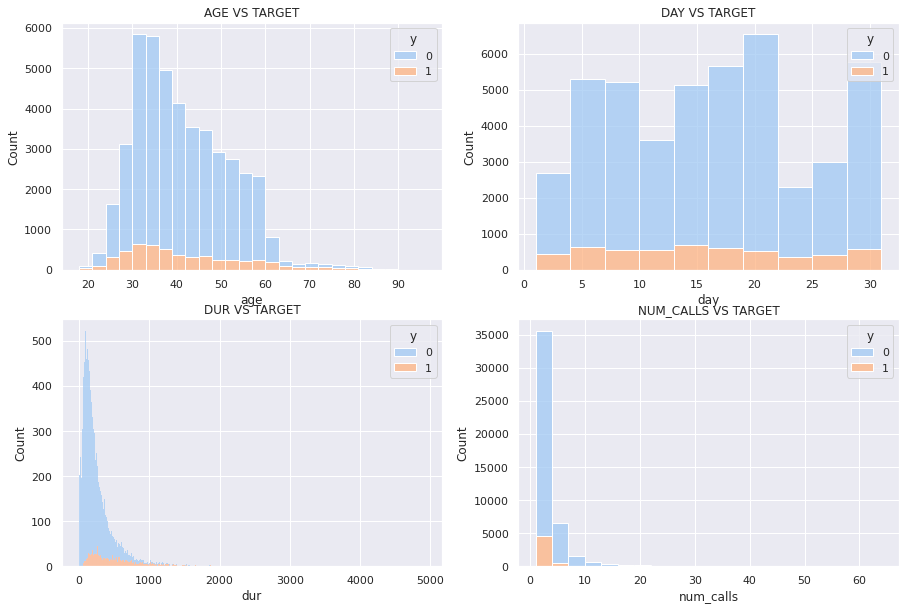

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.histplot(data=df, x="age", hue="y", multiple="stack",binwidth=3)
plt.title('AGE VS TARGET')

plt.subplot(222)
sns.histplot(data=df, x="day", hue="y", multiple="stack",binwidth=3)
plt.title('DAY VS TARGET')

plt.subplot(223)
sns.histplot(data=df, x="dur", hue="y", multiple="stack",binwidth=3)
plt.title('DUR VS TARGET')

plt.subplot(224)
sns.histplot(data=df, x="num_calls", hue="y", multiple="stack",binwidth=3)
plt.title('NUM_CALLS VS TARGET')

plt.show()
plt.tight_layout()

1.Middle Age peoples insured more than the young and aged ones.


2.Day may not be a reason for subscribtion. Either we can drop it or keep it.


3.Duration of the call plays a major role in subscribtion.



4.Number of calls may be one of the reason for the subscribtion.




**From this plot itself we came to know there is an imbalance data in target variable. **

# **FEATURE ANALYSIS**

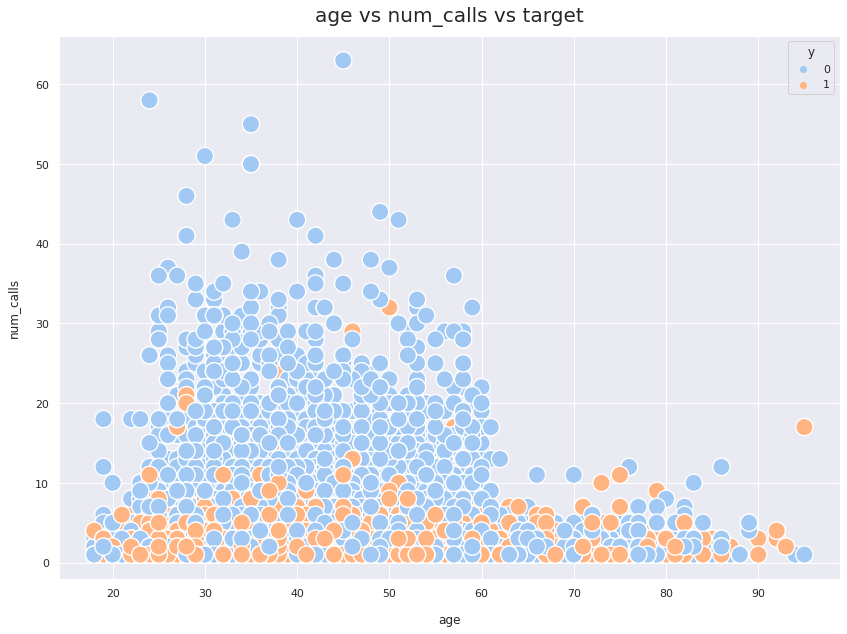

In [ ]:
import seaborn as sns
plt.figure(figsize=(14,10))
sns.scatterplot(x='age', y='num_calls', hue='y', data=df, s=300)
plt.title("age vs num_calls vs target", y=1.015, fontsize=20)
plt.xlabel("age", labelpad=15)
plt.ylabel("num_calls", labelpad=15)
ax = plt.gca()

Age may be the reason for the bank people to increase the number of calls.

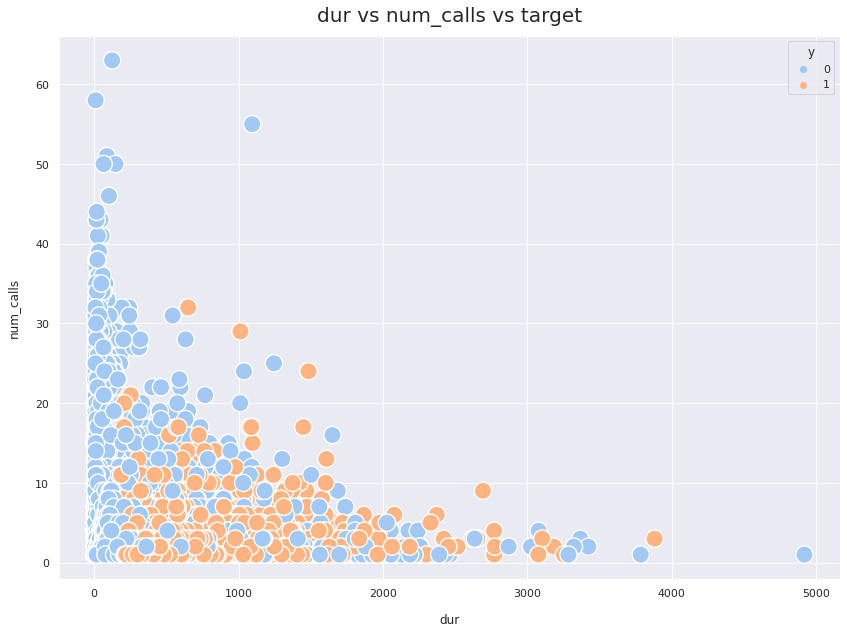

In [ ]:
import seaborn as sns
plt.figure(figsize=(14,10))
sns.scatterplot(x='dur', y='num_calls', hue='y', data=df, s=300)
plt.title("dur vs num_calls vs target", y=1.015, fontsize=20)
plt.xlabel("dur", labelpad=15)
plt.ylabel("num_calls", labelpad=15)
ax = plt.gca()    

From this plot we can observe that the people who doesn't pick and who doesn't subcribe the insurance may leads to call more number of times.

Another view of the plot is the insurance subscribed more when they spend more duration to discuss with the bank people to know about insurance policies.


FROM EDA PART,

The 3 feature importance in our point of view:

1.Number calls they made
2.Duration of the call they spend
3.Maritial status


# **ENCODE THE DATA**

**LABEL ENCODING**

In [ ]:
df['job']=df['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'unknown':5,'self-employed':6,'admin.':7,'management':8,'unemployed':9,'retired':10,'student':11})
df['education_qual']=df['education_qual'].map({'primary':0,'secondary':1,'unknown':2,'tertiary':3})
df['call_type']=df['call_type'].map({'unknown':0,'telephone':1,'cellular':2})
df['mon']=df['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

**ONE-HOT ENCODING**

In [ ]:
df= pd.get_dummies(df, columns=["marital",'prev_outcome'])
df.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,8,3,0,5,0,261,1,0,0,1,0,0,0,0,1
1,44,4,1,0,5,0,151,1,0,0,0,1,0,0,0,1
2,33,1,1,0,5,0,76,1,0,0,1,0,0,0,0,1
3,47,0,2,0,5,0,92,1,0,0,1,0,0,0,0,1
4,33,5,2,0,5,0,198,1,0,0,0,1,0,0,0,1


# **TARGET AND FEATURE SELCTION:**

In [ ]:
X = df.drop(['y'],axis=1)
y = df['y'].values

We have selected our features and the target variable.

**SPLITTING THE DATA INTO TRAIN AND TEST**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

# **Random Undersampling:**

As the target variable is imbalanced,random undersampling is required.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler #  import 
rus = RandomUnderSampler() #Intialise the model
X_rus, y_rus = rus.fit_resample(X_train, y_train) #resampling the data 
     

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

LR = LogisticRegression()
LR.fit(X_rus,y_rus)
LR.score(X_rus,y_rus)
     

0.8022069292833413

# **Random Oversampling:**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler() #Initialis the model 
X_ros, y_ros = ros.fit_resample(X_train, y_train) #Fit the model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr2 = LogisticRegression()
lr2.fit(X_ros,y_ros)
lr2.score(X_ros,y_ros)

0.8067136150234742

# **SMOTE:**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr3 = LogisticRegression()
lr3.fit(X_sm,y_sm)
lr3.score(X_sm,y_sm)    

0.8570422535211267

# **SMOTEENN**

In [ ]:
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
X_smt, y_smt = smt.fit_resample(X_train, y_train) 

In [ ]:
import collections, numpy
counter = collections.Counter(y_smt)
counter


Counter({0: 23422, 1: 30564})

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr3 = LogisticRegression()
lr3.fit(X_smt,y_smt)
lr3.score(X_smt,y_smt)
     

0.9170525691846034

**To balance the data:**


1.For Random under sampling , the model score is 79.97%.

2.For Random over sampling , the model score is 80.54%.

3.SMOTE, the model score is 84.80%.

4.SMOTE + Tomek, the model score is 90.45%.

Here we got the best score from SMOTE+Tomek which is 90.45%.

Now,We gonna use SMOTE+Tomek technique to build the models.


# **1. Logistic Regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_smt,y_smt)
lr.score(X_smt,y_smt)

0.9170525691846034

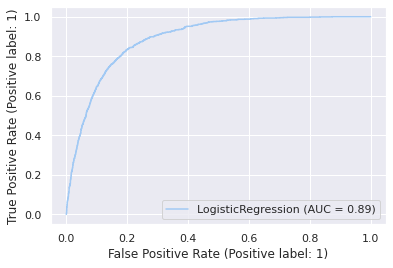

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(lr, X_test, y_test)

# ***2.Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(X_smt,y_smt) 
print(dtc.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dtc.predict_proba(X_test)[:, 1]))

1.0
AUROC on the sampled dataset :  0.7847507137894191


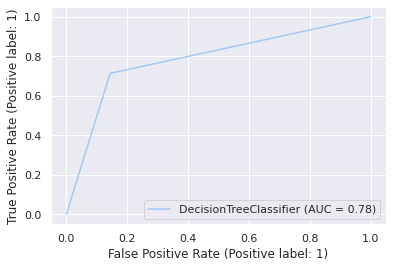

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(dtc, X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_smt, y_smt) # the model is trained
  trainAccuracy = accuracy_score(y_smt, dt.predict(X_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_test, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.774886081576705  Cross val score :  0.8810972717938688
Depth  :  2  Training Accuracy :  0.8172674397065905  Cross val score :  0.8904999266611254
Depth  :  3  Training Accuracy :  0.8726336457600119  Cross val score :  0.8949240942649
Depth  :  4  Training Accuracy :  0.9022894824584151  Cross val score :  0.8995695008067276
Depth  :  5  Training Accuracy :  0.9156818434408921  Cross val score :  0.8960310223439103
Depth  :  6  Training Accuracy :  0.9277960952839626  Cross val score :  0.8954776805358626
Depth  :  7  Training Accuracy :  0.9381321083243804  Cross val score :  0.8917171075147898
Depth  :  8  Training Accuracy :  0.9445782239839958  Cross val score :  0.8921597076223537
Depth  :  9  Training Accuracy :  0.9505983032638091  Cross val score :  0.8903899183493864
Depth  :  10  Training Accuracy :  0.957822398399585  Cross val score :  0.8900572043221043
Depth  :  20  Training Accuracy :  0.9989071240692031  Cross val score :  0.87269300

In [ ]:
dtc=DecisionTreeClassifier(max_depth=8)
dtc.fit(X_smt,y_smt) 
print(dtc.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dtc.predict_proba(X_test)[:, 1]))

0.9445782239839958
AUROC on the sampled dataset :  0.8907960576636753


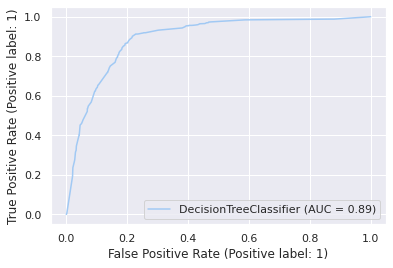

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(dtc, X_test, y_test)     


# 3. K-NEAREST NEIGHBOUR: 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(X_smt, y_smt) 
  print("K value :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_test, y_test, cv=10)))

K value : 1 Cross Value Accuracy : 0.8534458270180414
K value : 2 Cross Value Accuracy : 0.8794382242213856
K value : 3 Cross Value Accuracy : 0.8783336185400674
K value : 4 Cross Value Accuracy : 0.8843059697843836
K value : 5 Cross Value Accuracy : 0.8844168337163252
K value : 6 Cross Value Accuracy : 0.885190681073681
K value : 7 Cross Value Accuracy : 0.8850803060675695
K value : 8 Cross Value Accuracy : 0.8853011783112501
K value : 9 Cross Value Accuracy : 0.8850803060675696
K value : 10 Cross Value Accuracy : 0.8854117977802767
K value : 20 Cross Value Accuracy : 0.8849696865985429
K value : 30 Cross Value Accuracy : 0.8843056030900112
K value : 40 Cross Value Accuracy : 0.8840842419205007
K value : 50 Cross Value Accuracy : 0.8833100278687723


In [ ]:
knn= KNeighborsClassifier(i)
knn.fit(X_smt, y_smt)
print(knn.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(X_test)[:, 1]))    

0.9129403919534694
AUROC on the sampled dataset :  0.8463446975226107


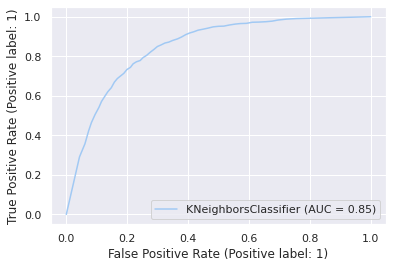

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(knn, X_test, y_test)    

# **4. XG_BOOST:**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model 
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(model, X_test, y_test, cv=10)))

Learning rate :  0.01  Cross-Val score :  0.8947027330953894
Learning rate :  0.02  Cross-Val score :  0.8975777392069624
Learning rate :  0.03  Cross-Val score :  0.8973567447318243
Learning rate :  0.04  Cross-Val score :  0.8966931501491224
Learning rate :  0.05  Cross-Val score :  0.8992370312423604
Learning rate :  0.1  Cross-Val score :  0.9007860705031046
Learning rate :  0.11  Cross-Val score :  0.9011170732899819
Learning rate :  0.12  Cross-Val score :  0.9007850926514447
Learning rate :  0.13  Cross-Val score :  0.9012279372219234
Learning rate :  0.14  Cross-Val score :  0.9001224759204028
Learning rate :  0.15  Cross-Val score :  0.8994586368747861
Learning rate :  0.2  Cross-Val score :  0.902888329340439
Learning rate :  0.5  Cross-Val score :  0.8980210727032709
Learning rate :  0.7  Cross-Val score :  0.8981320588666699
Learning rate :  1  Cross-Val score :  0.8947037109470493


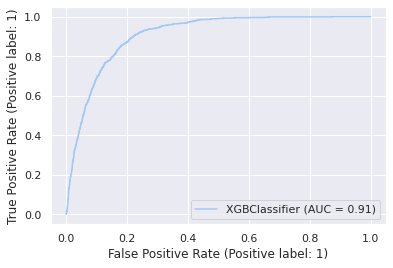

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
model = xgb.XGBClassifier(learning_rate = 0.14, n_estimators=100, verbosity = 0) # initialise the model 
model.fit(X_smt,y_smt)
plot_roc_curve(model, X_test, y_test)
     

In [ ]:
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, model.predict_proba(X_test)[:, 1]))

AUROC on the sampled dataset :  0.9080767681249964


# **5. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy") 
classifier.fit(X_smt, y_smt) 
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

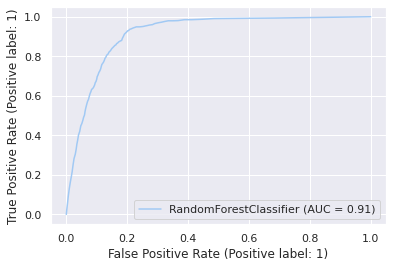

In [ ]:
plot_roc_curve(classifier, X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy") 
classifier.fit(X_smt, y_smt) 
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, classifier.predict_proba(X_test)[:, 1]))

AUROC on the sampled dataset :  0.9155972767984866


# **FEATURE IMPORTANCE FROM ALL MODELS:**

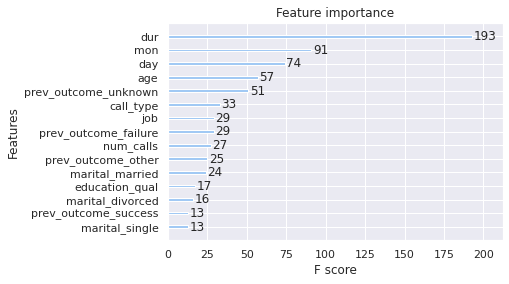

In [ ]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()

In [ ]:
importance = dtc.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.015570205637716477, 'age'),
 (0.01443533708540719, 'job'),
 (0.0006847286443505489, 'education_qual'),
 (0.03331198148771999, 'call_type'),
 (0.01975089085649537, 'day'),
 (0.09048763656567581, 'mon'),
 (0.4699005730726168, 'dur'),
 (0.007453084193618073, 'num_calls'),
 (0.00048191149502934403, 'marital_divorced'),
 (0.002194154344967306, 'marital_married'),
 (0.0006343349216748045, 'marital_single'),
 (0.09588376223987966, 'prev_outcome_failure'),
 (0.0510233600814795, 'prev_outcome_other'),
 (0.002461338135220107, 'prev_outcome_success'),
 (0.19572670123814895, 'prev_outcome_unknown')]

In [ ]:
importance = classifier.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.0637242608933641, 'age'),
 (0.040470464940142996, 'job'),
 (0.01869831838486792, 'education_qual'),
 (0.04148231624994581, 'call_type'),
 (0.05775085142566534, 'day'),
 (0.09049055055219442, 'mon'),
 (0.3788271263674622, 'dur'),
 (0.039032940510585874, 'num_calls'),
 (0.027858926208843355, 'marital_divorced'),
 (0.039218439041706375, 'marital_married'),
 (0.03180201454254494, 'marital_single'),
 (0.050538526440418036, 'prev_outcome_failure'),
 (0.02154737339308103, 'prev_outcome_other'),
 (0.0067977156066028055, 'prev_outcome_success'),
 (0.09176017544257485, 'prev_outcome_unknown')]

In [ ]:
importance = model.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.02667674, 'age'),
 (0.03404953, 'job'),
 (0.01723447, 'education_qual'),
 (0.04683334, 'call_type'),
 (0.0077445097, 'day'),
 (0.0642099, 'mon'),
 (0.13003285, 'dur'),
 (0.044359054, 'num_calls'),
 (0.12937674, 'marital_divorced'),
 (0.05631963, 'marital_married'),
 (0.08873828, 'marital_single'),
 (0.14992596, 'prev_outcome_failure'),
 (0.042651944, 'prev_outcome_other'),
 (0.0074183713, 'prev_outcome_success'),
 (0.15442865, 'prev_outcome_unknown')]

# **SOLUTION STATEMENT:**

**MODELLING**

Models are tested to see which one can better predict consumer conversion.

1.LOGISTIC REGRESSION, the model AUROC score is 0.89

2.DECISION TREE, the model AUROC score is 0.78,

3.DECISION TREE with max depth, the model AUROC score is 0.89

4.KNN, the model AUROC score is 0.85

5.RANDOM FOREST, the model AUROC score is 0.915

6.XG BOOST CLASSIFIER, the model AUROC score is 0.908

The model RANDOM FOREST has the highest AUROC score, coming in at 0.915

# **BUSINESS INTERPRETATIONS**

IMPORTANT FEATURES FOR MAKING PREDICTIONS,

1.Duration of the call: The length of time we spend interacting with consumers will have a significant influence on conversion.

2.Month :One of the reasons a consumer could consider it is that we are offering insurance during the ideal time of year,that is during the financial year ends

3.Pervious outcome unknown : It's crucial to improve our first impression. Because the preceeding result greatly influences customers' decisions

4.Marital_married: People who got married may consider purchasing insurance.



At the end of these analysis, we came to know that we have to approach right person in the right time and explain it in a right manner.Here, the term right person means married peoples who have more responsibility then other, right time in the sense on which time they may be avaiable which month they may think of it and right manner means the processes of explanation we have make begin the conversation in an interesting way and end with a detailed package.